# 1. Import Python Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from  scipy.stats import zscore
import seaborn as sns
import sklearn
import folium
import datetime



# 2. Import the data

In [2]:
# Read the CSV file into a DataFrame
data = pd.read_csv(r"/Users/mayumi/Downloads/product_sales.csv")

# Display all columns
pd.set_option('display.max_columns', None)

# Print the first 5 rows to check
print(data.head())

   week  sales_method                           customer_id  nb_sold  revenue  \
0     2         Email  2e72d641-95ac-497b-bbf8-4861764a7097       10      NaN   
1     6  Email + Call  3998a98d-70f5-44f7-942e-789bb8ad2fe7       15   225.47   
2     5          Call  d1de9884-8059-4065-b10f-86eef57e4a44       11    52.55   
3     4         Email  78aa75a4-ffeb-4817-b1d0-2f030783c5d7       11      NaN   
4     3         Email  10e6d446-10a5-42e5-8210-1b5438f70922        9    90.49   

   years_as_customer  nb_site_visits      state  
0                  0              24    Arizona  
1                  1              28     Kansas  
2                  6              26  Wisconsin  
3                  3              25    Indiana  
4                  0              28   Illinois  


# 3. Data validation:

## Cleaning Exercise
  First we need to identify which data cleaning issues could apply to our data set 
  
1. `Missing Data: Identify and handle missing values.`
2. `Duplicate Data: Remove duplicate entries.`
3. `Outliers: Detect and handle outliers.`
4. `Incorrect Data: Correct erroneous data entries.`
5. `Inconsistent Data: Standardize units and formats.`

6. Categorical Data Issues: Encode by grouping or labeling categorical data.
7. Data Decay: Remove outdated records.
8. Unnormalized Data: Normalize numerical data.
9. Data Integration Issues: Ensure consistent formats before merging datasets.
10. Data Redundancy: Remove redundant columns.


## 3.1 Missing Data

Which columns have missing data?
- [ ] week
- [ ] sales_method
- [ ] customer_id
- [ ] nb_sold
- [x] revenue
- [ ] years_as_customer
- [ ] nb_site_visits
- [ ] state    

Result: There are missing values of revenue, and as we don't have a detailed order of products sold or the price of each product - we can't calculate the missing revenues. 

Recommendation: It will be valuable to store a detailed version of products sold per customer or a validation to ensure the revenue field is populated.


In [3]:
# Count the number of non-empty rows for each column
total_rows = data.count()

# Determine if any column has fewer non-empty rows than the total number of rows
boolean_empty_rows = (total_rows != len(data)).any()

# Print whether there are empty rows
print("Has empty values: " + str(boolean_empty_rows))
print("")
print(total_rows)

Has empty values: True

week                 15000
sales_method         15000
customer_id          15000
nb_sold              15000
revenue              13926
years_as_customer    15000
nb_site_visits       15000
state                15000
dtype: int64


## 3.2 Duplicate Data

Which columns have duplicated data? 
- [ ] week
- [ ] sales_method
- [ ] customer_id
- [ ] nb_sold
- [ ] revenue
- [ ] years_as_customer
- [ ] nb_site_visits
- [ ] state    


In [4]:
# Get duplicated rows
duplicated_rows = data[data.duplicated()]

# Check if there are any duplicated rows
has_duplicated_rows = not duplicated_rows.empty

# Print the result
print("Has duplicated rows: " + str(has_duplicated_rows))

Has duplicated rows: False


## 3.3 Outliers

Which columns have outliers?
- [ ] week
- [ ] sales_method
- [ ] customer_id
- [x] nb_sold
- [x] revenue
- [x] years_as_customer
- [x] nb_site_visits
- [ ] state  

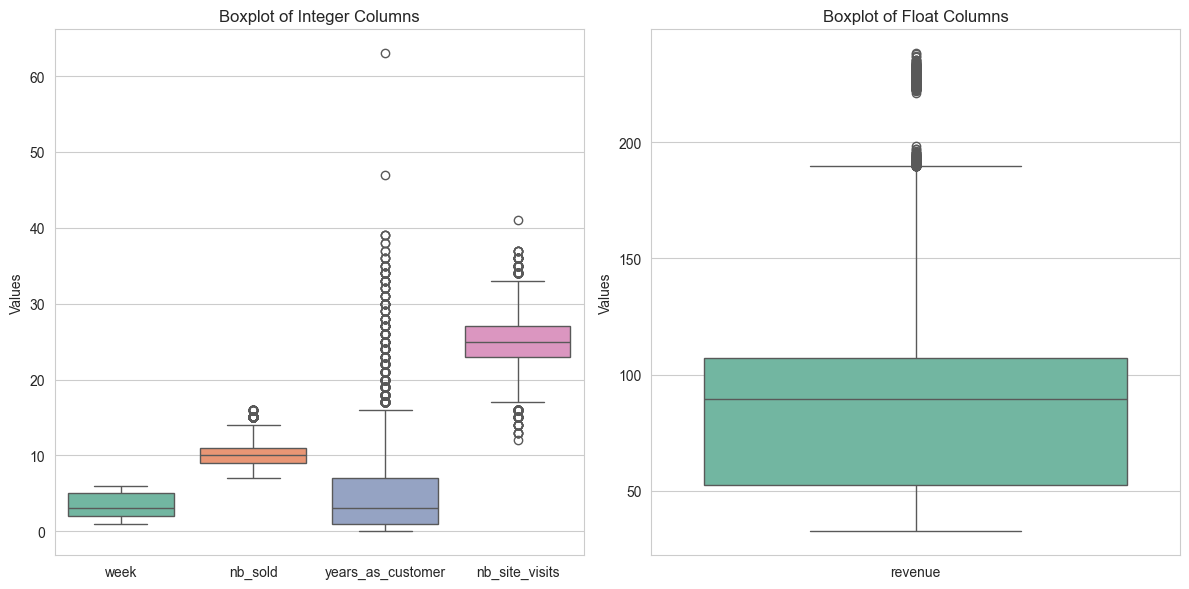

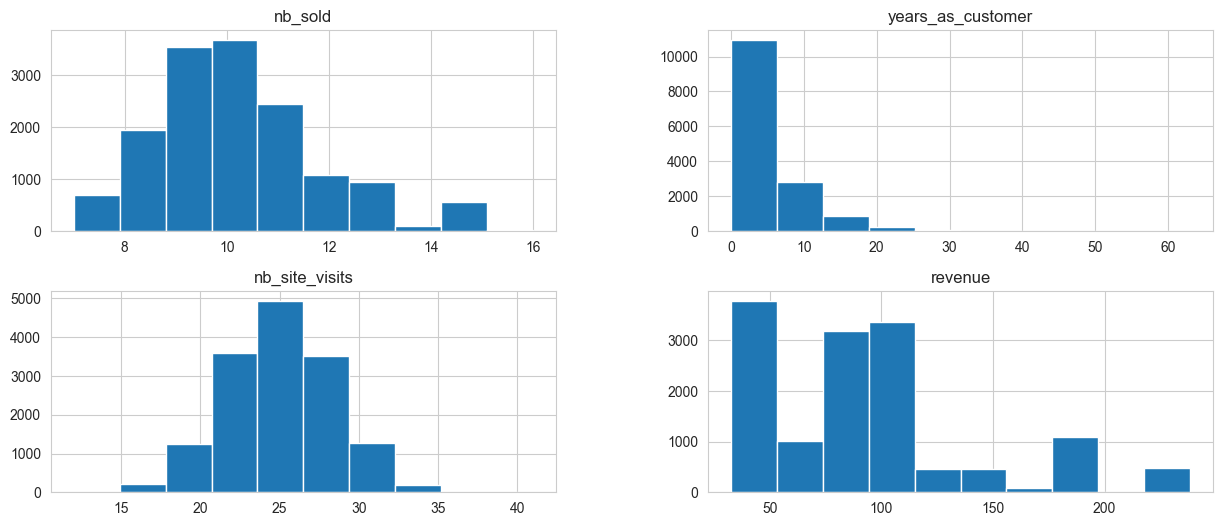

In [5]:
# Select only numerical columns
boxplot_data = data.select_dtypes(include=['int'])

# Select only float columns
boxplot_revenue_data = data.select_dtypes(include=['float'])

# Set style
sns.set_style("whitegrid")

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Create boxplot for integer columns
sns.boxplot(data=boxplot_data, palette="Set2", ax=axes[0])
axes[0].set_title('Boxplot of Integer Columns')
axes[0].set_ylabel('Values')

# Create boxplot for float columns
sns.boxplot(data=boxplot_revenue_data, palette="Set2", ax=axes[1])
axes[1].set_title('Boxplot of Float Columns')
axes[1].set_ylabel('Values')

plt.tight_layout()  # Adjust layout
plt.show()

# Histogram
data[['nb_sold','years_as_customer','nb_site_visits','revenue']].hist(figsize=(15, 6))
plt.show()


Outliers based on IQR:
586

Percentage of number of items sold outliers: 3.9066666666666667

Outliers based on Z-Score:
31

Percentage of number of items sold outliers: 0.20666666666666667


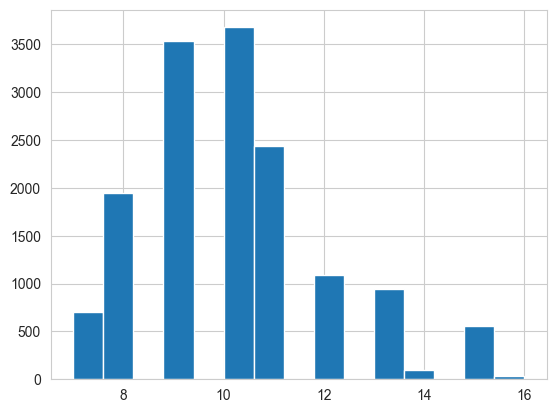

In [6]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = data['nb_sold'].quantile(0.25)
Q3 = data['nb_sold'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = data[(data['nb_sold'] < lower_bound) | (data['nb_sold'] > upper_bound)]

print("Outliers based on IQR:")
print(outliers['nb_sold'].count())
print("\nPercentage of number of items sold outliers: " + str(outliers['nb_sold'].count()/len(data)*100))

# Calculate Z-scores
data['z_score'] = (data['nb_sold'] - data['nb_sold'].mean()) / data['nb_sold'].std()

# Identify outliers (Z-score > 3 or < -3)
outliers_zscore = data[np.abs(data['z_score']) > 3]

print("\nOutliers based on Z-Score:")
print(outliers_zscore['nb_sold'].count())
print("\nPercentage of number of items sold outliers: " + str(outliers_zscore['nb_sold'].count()/len(data)*100))

# Histogram
data['nb_sold'].hist(bins=15)
plt.show()


Outliers based on IQR:
634

Percentage of revenue outliers: 4.226666666666667

Outliers based on Z-Score:
4

Percentage of revenue outliers: 0.02666666666666667


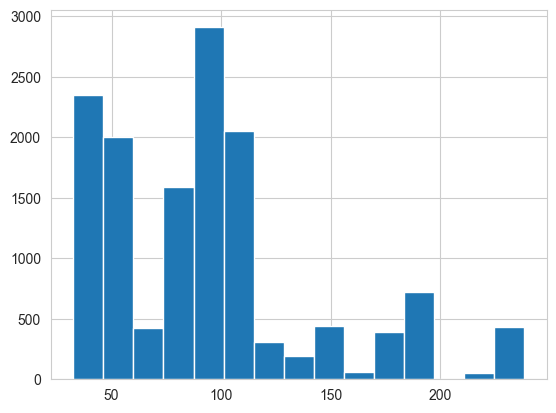

In [7]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = data['revenue'].quantile(0.25)
Q3 = data['revenue'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = data[(data['revenue'] < lower_bound) | (data['revenue'] > upper_bound)]

print("Outliers based on IQR:")
print(outliers['revenue'].count())
print("\nPercentage of revenue outliers: " + str(outliers['revenue'].count()/len(data)*100))

# Calculate Z-scores
data['z_score'] = (data['revenue'] - data['revenue'].mean()) / data['revenue'].std()

# Identify outliers (Z-score > 3 or < -3)
outliers_zscore = data[np.abs(data['z_score']) > 3]

print("\nOutliers based on Z-Score:")
print(outliers_zscore['revenue'].count())
print("\nPercentage of revenue outliers: " + str(outliers_zscore['revenue'].count()/len(data)*100))

# Histogram
data['revenue'].hist(bins=15)
plt.show()

In [8]:
# Calculate Z-scores for a normal distribution
data['z_score'] = (data['nb_site_visits'] - data['nb_site_visits'].mean()) / data['nb_site_visits'].std()

# Identify outliers (Z-score > 3 or < -3)
outliers_zscore = data[np.abs(data['z_score']) > 3]

print("\nOutliers based on Z-Score:")
print(outliers_zscore['nb_site_visits'].count())
print("\nPercentage of number of site visits outliers: " + str((outliers_zscore['nb_site_visits'].count()/len(data)*100)))



Outliers based on Z-Score:
32

Percentage of number of site visits outliers: 0.21333333333333335


Outliers based on IQR:
533

Percentage of outliers > years as customer: 3.5533333333333332

Outliers based on Z-Score:
251

Percentage of outliers > years as customer: 1.6733333333333333


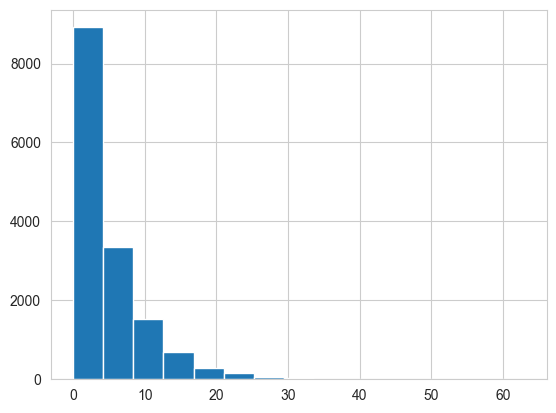

In [9]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = data['years_as_customer'].quantile(0.25)
Q3 = data['years_as_customer'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = data[(data['years_as_customer'] < lower_bound) | (data['years_as_customer'] > upper_bound)]

print("Outliers based on IQR:")
print(outliers['years_as_customer'].count())
print("\nPercentage of outliers > years as customer: " + str(outliers['years_as_customer'].count()/len(data)*100))

# Calculate Z-scores
data['z_score'] = (data['years_as_customer'] - data['years_as_customer'].mean()) / data['years_as_customer'].std()

# Identify outliers (Z-score > 3 or < -3)
outliers_zscore = data[np.abs(data['z_score']) > 3]

print("\nOutliers based on Z-Score:")
print(outliers_zscore['years_as_customer'].count())
print("\nPercentage of outliers > years as customer: " + str(outliers_zscore['years_as_customer'].count()/len(data)*100))

# Histogram
data['years_as_customer'].hist(bins=15)
plt.show()

## 3.4 Inconsistent Data

Which columns have inconsistent data?
- [ ] week
- [x] sales_method
- [x] customer_id
- [ ] nb_sold
- [ ] revenue
- [ ] years_as_customer
- [ ] nb_site_visits
- [x] state  

Result: The strings were saved as object data types, so I changed it to string for an easier manipulation. 

In [10]:
# Transform object data types to string

# Display original dtypes
print("Original dtypes:")
print(data.dtypes)

# Convert the 'B' column from object to string
data[['sales_method','customer_id','state']] = data[['sales_method','customer_id','state']].astype('string')

# Display new dtypes
print("\nNew dtypes after conversion:")
print(data.dtypes)

Original dtypes:
week                   int64
sales_method          object
customer_id           object
nb_sold                int64
revenue              float64
years_as_customer      int64
nb_site_visits         int64
state                 object
z_score              float64
dtype: object

New dtypes after conversion:
week                          int64
sales_method         string[python]
customer_id          string[python]
nb_sold                       int64
revenue                     float64
years_as_customer             int64
nb_site_visits                int64
state                string[python]
z_score                     float64
dtype: object


## 3.5 Incorrect Data

Which columns have incorrect data?
- [ ] week
- [x] sales_method
- [ ] customer_id
- [ ] nb_sold
- [ ] revenue
- [x] years_as_customer
- [ ] nb_site_visits
- [ ] state  

Result: 
1. The sales method had 5 different values, when only 3 were expected. I cleaned and merge the definitions reducing it to the 3 valid values (email+call, email and call)
2. 2% of customers were outliers in the years_as_customer, however 2 of them were definetly wrong as they were customers before the company was founded. I removed the wrong values and would be great to check and update as soon we know the correct year they joined as a customer

In [11]:
# Calculate years since foundation
years_since_foundation = datetime.datetime.now().year - 1984

# Identify incorrect years
incorrect_years = data[data['years_as_customer'] >= years_since_foundation][['customer_id', 'years_as_customer']]

print("There are " + str(years_since_foundation) + " years since the company's foundation, any value in 'years_as_customer' above this is wrong")
print("\nDetails of customers with incorrect years data")
print(incorrect_years)

# Replace incorrect data with pd.NA
data.loc[data['years_as_customer'] >= years_since_foundation, 'years_as_customer'] = pd.NA

print("\nDataFrame after replacing incorrect years with NA:")
print(data[data['years_as_customer'].isna()][['customer_id', 'years_as_customer']])


There are 40 years since the company's foundation, any value in 'years_as_customer' above this is wrong

Details of customers with incorrect years data
                                customer_id  years_as_customer
13741  18919515-a618-430c-9a05-2c7d8fea96af                 63
13800  2ea97d34-571d-4e1b-95be-fea1c404649f                 47

DataFrame after replacing incorrect years with NA:
                                customer_id  years_as_customer
13741  18919515-a618-430c-9a05-2c7d8fea96af                NaN
13800  2ea97d34-571d-4e1b-95be-fea1c404649f                NaN


In [12]:
duplicated_customers = data['customer_id'].nunique()
duplicated_sales_method = data['sales_method'].nunique()
duplicated_state = data['state'].nunique()

expected_unique_customers = len(data)
expected_sales_method = 3
expected_states = 50

paragraph = f"""
The data analysis shows the following unique counts:

GIVEN there're {expected_unique_customers} rows
WHEN counting the number of unique customers
THEN expected {expected_unique_customers}
    - Found: {duplicated_customers}
    - Has duplicated data: {duplicated_customers != expected_unique_customers}
    
GIVEN there're {expected_states} states in the USA
WHEN counting the number of unique values in the state column
THEN expected 50
    - Found: {duplicated_state}
    - Has duplicated data: {duplicated_state != expected_states}

GIVEN there're {expected_sales_method} sales methods
WHEN counting the number of unique values in the sales method column
THEN expected 3
    - Found: {duplicated_sales_method}
    - Has duplicated data: {duplicated_sales_method != expected_sales_method}
"""

print(paragraph)

print("\nAll values inputed as sales methods")
print(data['sales_method'].unique())

# Replacing typo issues of sales methods
data.replace('em + call', 'Email + Call', inplace=True)
data.replace('email', 'Email', inplace=True)

print("\nSales method replaced for consistency")
print(data['sales_method'].unique())




The data analysis shows the following unique counts:

GIVEN there're 15000 rows
WHEN counting the number of unique customers
THEN expected 15000
    - Found: 15000
    - Has duplicated data: False
    
GIVEN there're 50 states in the USA
WHEN counting the number of unique values in the state column
THEN expected 50
    - Found: 50
    - Has duplicated data: False

GIVEN there're 3 sales methods
WHEN counting the number of unique values in the sales method column
THEN expected 3
    - Found: 5
    - Has duplicated data: True


All values inputed as sales methods
<StringArray>
['Email', 'Email + Call', 'Call', 'em + call', 'email']
Length: 5, dtype: string

Sales method replaced for consistency
<StringArray>
['Email', 'Email + Call', 'Call']
Length: 3, dtype: string


# 4. Exploratory Analysis

In [13]:
# Return a statistical summary of every column
data_description = data.describe()

print("Analysis: \n - The average revenue is higher than the median, meaning some high value purchases are skewing the distribution")
print(" - The average of items sold is pretty similar to the mean, which means a product with high aggregate value makes a big difference in revenue and not the quantity \n")
print(data_description)

Analysis: 
 - The average revenue is higher than the median, meaning some high value purchases are skewing the distribution
 - The average of items sold is pretty similar to the mean, which means a product with high aggregate value makes a big difference in revenue and not the quantity 

               week       nb_sold       revenue  years_as_customer  \
count  15000.000000  15000.000000  13926.000000       14998.000000   
mean       3.098267     10.084667     93.934943           4.959261   
std        1.656420      1.812213     47.435312           5.011237   
min        1.000000      7.000000     32.540000           0.000000   
25%        2.000000      9.000000     52.470000           1.000000   
50%        3.000000     10.000000     89.500000           3.000000   
75%        5.000000     11.000000    107.327500           7.000000   
max        6.000000     16.000000    238.320000          39.000000   

       nb_site_visits       z_score  
count    15000.000000  1.500000e+04  
mean

### 4.1 How many customers were there for each approach?


Analysis: 
 - The number of customers per method isn't evenly distributed making it hard to understand efficiency of conversion per method.
 - 2481 hours were spent with customers contacted only by calls. And 429 hours with customers that were also emailed

Recommendation: 
 - Store customers communications events data to further understand effectiveness of conversion per method overtime.


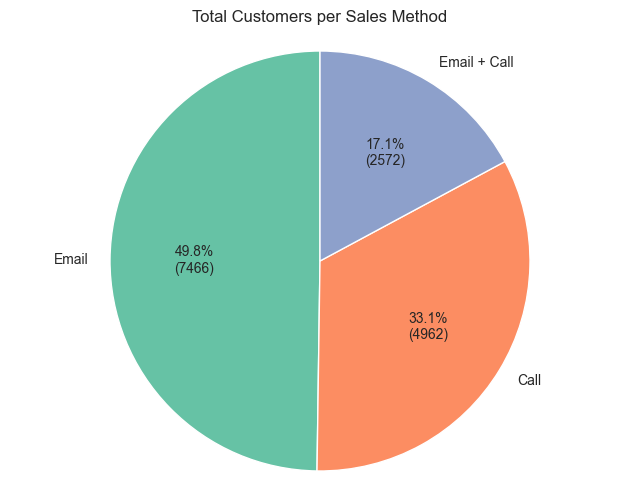

In [14]:
# Aggregate Data
sales_method_counts = data['sales_method'].value_counts().reset_index()
sales_method_counts.columns = ['sales_method', 'count']

# Plot the Pie Chart
fig, ax = plt.subplots(figsize=(8, 6))

# Create the pie chart
wedges, texts, autotexts = ax.pie(
    sales_method_counts['count'],
    labels=sales_method_counts['sales_method'],
    autopct='%1.1f%%',
    startangle=90,
    colors=sns.color_palette('Set2', len(sales_method_counts))
)

# Add the count inside each wedge
for i, autotext in enumerate(autotexts):
    autotext.set_text(f'{autotext.get_text()}\n({sales_method_counts["count"].iloc[i]})')

# Equal aspect ratio ensures that pie is drawn as a circle
ax.axis('equal')
plt.title('Total Customers per Sales Method')

print("Analysis: \n - The number of customers per method isn't evenly distributed making it hard to understand efficiency of conversion per method.")
print(" - " +str(round((30*4962)/60)) + " hours were spent with customers contacted only by calls. And " + str(round((10*2572)/60)) + " hours with customers that were also emailed")
print("\nRecommendation: \n - Store customers communications events data to further understand effectiveness of conversion per method overtime.")

plt.show()

### 4.2 What does the spread of the revenue look like overall? And for each method?


Analysis: 
 - The lower revenue customers were reached by call, making the method the least attractive with the highest effort (30 min) and lower return on revenue
 - The customers approached via email were nearly 50% with a minimum revenue of $78.83 and the average nearly 2x higher than the ones contacted by call
 - The email + call performed really well in terms of spent, however they were only 17% of the total customers. A further investigation on conversion and increase on this numbers would help to understand this method better. 

             revenue                                                          \
               count        mean        std     min      25%     50%     75%   
sales_method                                                                   
Call          4781.0   47.597467   8.609899   32.54   41.470   49.07   52.68   
Email         6922.0   97.127684  11.210469   78.83   87.880   95.58  105.17   
Email + Call  2223.0  183.651233  29.083924  122.11  155.7

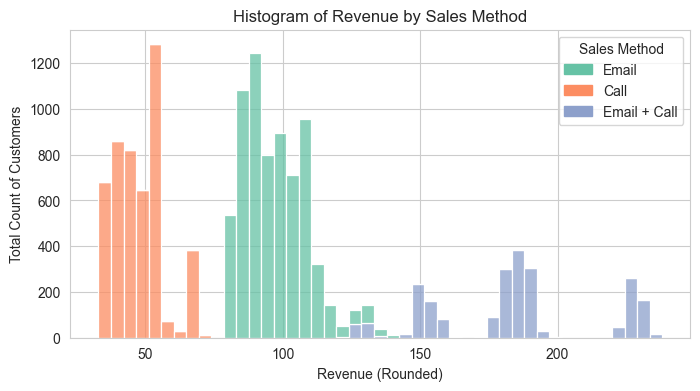

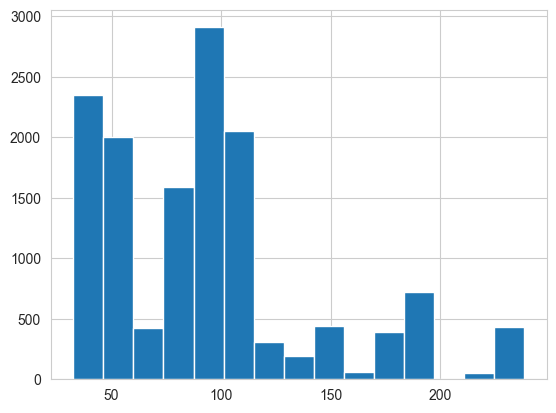

Analysis: 
 - There isn't an aglomeration of customers per cluster, but the oldest customers haven't reached the highest level of spent


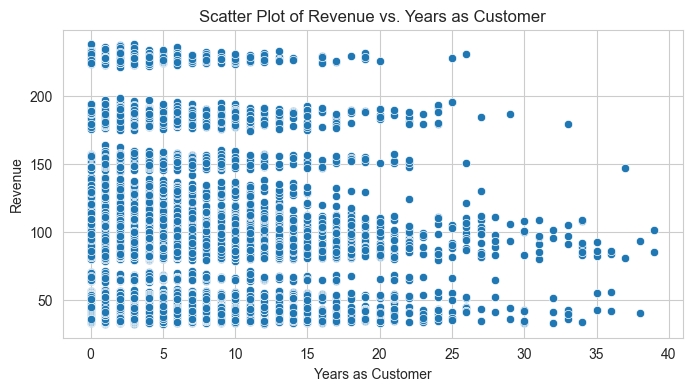

Analysis: 
 - There isn't an aglomeration of customers per cluster, but the more the customer visits, higher is the number of customer on the peak spent


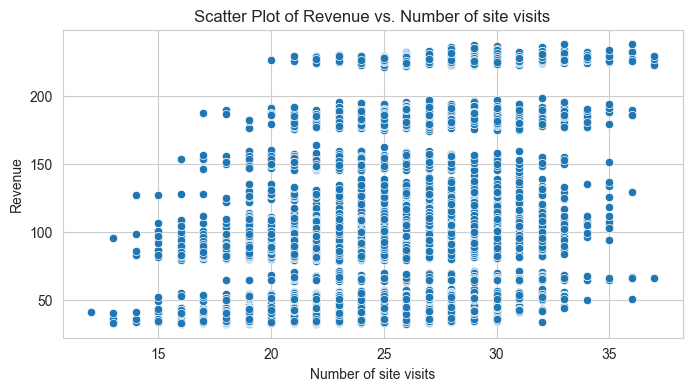

In [15]:
# Round the Revenue
data['revenue_rounded'] = data['revenue'].round()

# Define the pale color palette similar to 'Set2'
palette = sns.color_palette('Set2', 3)
sales_method_palette = dict(zip(['Email', 'Call', 'Email + Call'], palette))

# Plot the Histogram
plt.figure(figsize=(8, 4))
sns.histplot(data, x='revenue_rounded', hue='sales_method', multiple='stack', palette=sales_method_palette, kde=False)

plt.title('Histogram of Revenue by Sales Method')
plt.xlabel('Revenue (Rounded)')
plt.ylabel('Total Count of Customers')

# Create a custom legend
legend_labels = [Patch(color=sales_method_palette[method], label=method) for method in sales_method_palette]
plt.legend(handles=legend_labels, title='Sales Method')

print("Analysis: \n - The lower revenue customers were reached by call, making the method the least attractive with the highest effort (30 min) and lower return on revenue")
print(" - The customers approached via email were nearly 50% with a minimum revenue of $78.83 and the average nearly 2x higher than the ones contacted by call")
print(" - The email + call performed really well in terms of spent, however they were only 17% of the total customers. A further investigation on conversion and increase on this numbers would help to understand this method better. \n")

data_description_per_sales_method = data[['revenue','sales_method']].groupby('sales_method').describe()

print(data_description_per_sales_method)

plt.show()

# Histogram
data['revenue'].hist(bins=15)
plt.show()

print("Analysis: \n - There isn't an aglomeration of customers per cluster, but the oldest customers haven't reached the highest level of spent")

# Create scatter plot - Years as Customer
plt.figure(figsize=(8, 4))
sns.scatterplot(data=data, x='years_as_customer', y='revenue')
plt.title('Scatter Plot of Revenue vs. Years as Customer')
plt.xlabel('Years as Customer')
plt.ylabel('Revenue')
plt.show()

print("Analysis: \n - There isn't an aglomeration of customers per cluster, but the more the customer visits, higher is the number of customer on the peak spent")

# Create scatter plot - Number of site visits
plt.figure(figsize=(8, 4))
sns.scatterplot(data=data, x='nb_site_visits', y='revenue')
plt.title('Scatter Plot of Revenue vs. Number of site visits')
plt.xlabel('Number of site visits')
plt.ylabel('Revenue')
plt.show()


### 4.3 Was there any difference in revenue over time for each of the methods?

Analysis: 
 - Looking at the green line with the total revenue from emails, we can see the declined in revenue possibly caused by the lack of contact after the third week.
 - Email + Call method had a great performance on products with a high aggregated value, as its shown on the high increase in revenue from week 5 followed by a lower, but great, rate increase in items sold.
 - Call had the lowest revenue, as also demostrated on previous graph, but with a stable gain in revenue overtime. 

Recommendation: 
 - Email customers more frequently, fortnightly at a minimum. The first contact worked really well on the first week, after the second email on the third week there was a small increase in sales that massively declined.
 - The number of customers on the email + call method was the lowest, it would be great to contact more people using this method.



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/distributions.py:413: UserWarning: `bins` cannot be 'auto' when using weights. Setting `bins=10`, but you will likely want to adjust.
  warnings.warn(msg, UserWarning)


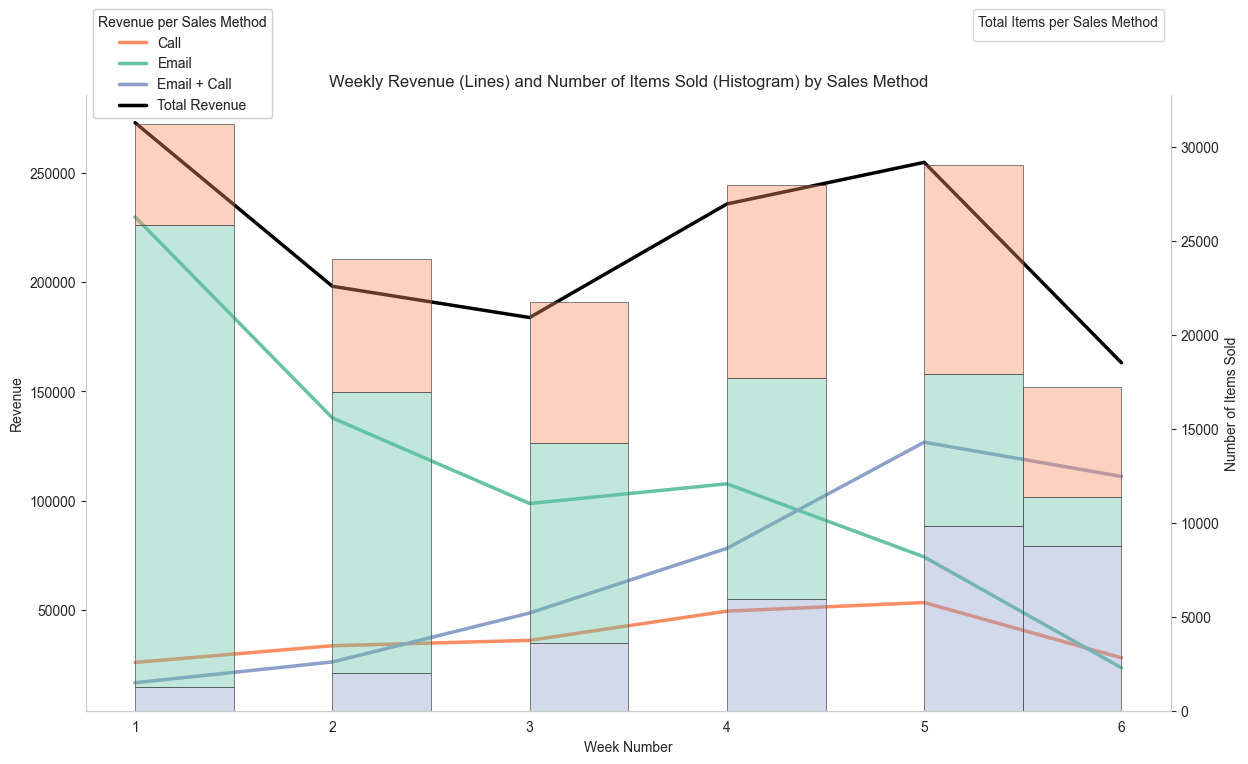

In [16]:
# Aggregate Data
weekly_revenue = data.groupby(['week', 'sales_method'])['revenue'].sum().reset_index()
weekly_sold = data.groupby(['week', 'sales_method'])['nb_sold'].sum().reset_index()
total_weekly_revenue = data.groupby('week')['revenue'].sum().reset_index()

# Define the color palette for sales methods
palette = sns.color_palette('Set2', 3)
sales_method_palette = dict(zip(['Email', 'Call', 'Email + Call'], palette))

# Plot the Raw Numbers
fig, ax1 = plt.subplots(figsize=(14, 8))

# Plot the histogram for number of items sold per week on the right y-axis, split by sales method
ax2 = ax1.twinx()
sns.histplot(data=weekly_sold, x='week', weights='nb_sold', hue='sales_method', multiple='stack', palette=sales_method_palette, alpha=0.4, edgecolor=".3", linewidth=.5, ax=ax2)
ax2.set_ylabel('Number of Items Sold')

# Plot lines for each sales method on the left y-axis
for method in weekly_revenue['sales_method'].unique():
    subset = weekly_revenue[weekly_revenue['sales_method'] == method]
    sns.lineplot(data=subset, x='week', y='revenue', label=method, ax=ax1, color=sales_method_palette[method], linewidth=2.5, zorder=10)

# Plot the total revenue line
sns.lineplot(data=total_weekly_revenue, x='week', y='revenue', label='Total Revenue', ax=ax1, color='black', linewidth=2.5, zorder=15)

ax1.set_ylabel('Revenue')

# Set titles and labels
ax1.set_title('Weekly Revenue (Lines) and Number of Items Sold (Histogram) by Sales Method')
ax1.set_xlabel('Week Number')

# Remove the grid
ax1.grid(False)
ax2.grid(False)

# Remove the top spine
ax1.spines['top'].set_visible(False)
ax2.spines['top'].set_visible(False)

# Add legends
lines_legend = ax1.legend(title='Revenue per Sales Method', loc='upper left', bbox_to_anchor=(0, 1.15), ncol=1)
hist_handles, hist_labels = ax2.get_legend_handles_labels()
hist_legend = ax2.legend(hist_handles, hist_labels, title='Total Items per Sales Method', loc='upper right', bbox_to_anchor=(1, 1.15), ncol=1)

# Add legends to the plot
ax1.add_artist(lines_legend)

print("Analysis: \n - Looking at the green line with the total revenue from emails, we can see the declined in revenue possibly caused by the lack of contact after the third week.")
print(" - Email + Call method had a great performance on products with a high aggregated value, as its shown on the high increase in revenue from week 5 followed by a lower, but great, rate increase in items sold.")
print(" - Call had the lowest revenue, as also demostrated on previous graph, but with a stable gain in revenue overtime. \n")

print("Recommendation: \n - Email customers more frequently, fortnightly at a minimum. The first contact worked really well on the first week, after the second email on the third week there was a small increase in sales that massively declined.")
print(" - The number of customers on the email + call method was the lowest, it would be great to contact more people using this method.\n")

plt.show()

### 4.4 Based on the data, which method would you recommend we continue to use? 
(Some of these methods take more time from the team so they may not be the best for us to use if the results are similar)


Assuming you have a limited list of customers to email and have commercial team availability for eventual calls, **the best mix of methods is Email and Email + Call.**

*Email + Call :*

<u>Pros</u> - The revenue of customers approached by this method is above any other. If the return keeps high and the commercial time isn't as expensive for 10 minutes calls per customer, it is worth investing on this method. 

<u>Cons</u> - Higher effort compared to only email, as you spend 10 minutes on calls.

*Email :*

<u>Pros</u> - Low effort to a high volume of sales with a great return on revenue

<u>Cons</u> - Limited customer engagement overtime and potential risk of spamming with sales emails, consequently losing their subscription to marketing communications.

### 4.5 Extra analysis from the data:

Description: 
 The darkest the red, the highest it is the positive correlation of 2 variables. The darkest is the blue, the higher it is the negative correlation.

 Analysis: 
 - The highest positive correlation lies on the week and number of items sold, meaning orders with the higher number of items sold were closed later in the weeks
 - Years as customer had a low negative correlation with all variables being inconclusive.


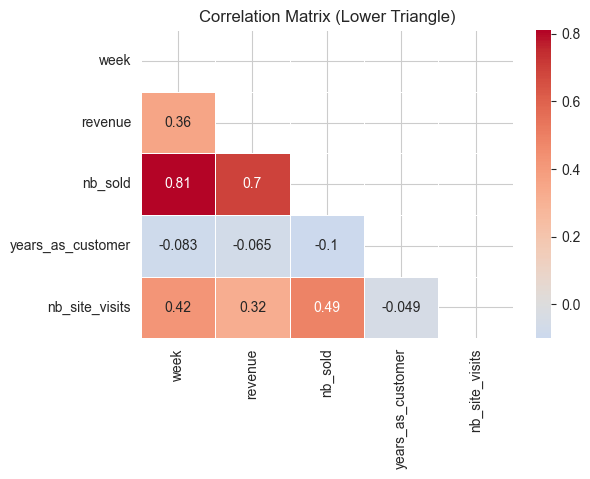

In [17]:
# Calculate the correlation matrix
correlation_matrix = data[['week', 'revenue', 'nb_sold', 'years_as_customer', 'nb_site_visits']].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(6, 4))

# Draw the heatmap with the mask
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm', center=0, linewidths=.5)

# Set the title
plt.title('Correlation Matrix (Lower Triangle)')

print("Description: \n The darkest the red, the highest it is the positive correlation of 2 variables. The darkest is the blue, the higher it is the negative correlation.")
print("\n Analysis: \n - The highest positive correlation lies on the week and number of items sold, meaning orders with the higher number of items sold were closed later in the weeks")
print(" - Years as customer had a low negative correlation with all variables being inconclusive.")

# Show the plot
plt.show()

In [18]:
# Calculate average revenue per state
revenue_per_state = data.groupby('state')['revenue'].mean().reset_index()

# Add state boundaries to the map using built-in data
states_json_file = 'us-states.json'

# Create a map centered around the US
m = folium.Map(location=[37.0902, -95.7129], zoom_start=4)

# Add choropleth layer to the map
folium.Choropleth(
    geo_data=states_json_file,
    name='choropleth',
    data=revenue_per_state,
    columns=['state', 'revenue'],
    key_on='feature.properties.name',
    fill_color='Reds',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Revenue ($)'
).add_to(m)

# Add title to the map
title_html = '''
             <h3 align="center" style="font-size:20px"><b>Average Revenue by State</b></h3>
             '''
m.get_root().html.add_child(folium.Element(title_html))

print("Description: \n This map shows the average revenue generated from sales in each state. The color intensity represents the revenue levels, with darker colors indicating higher revenue.")

# Display the map
m.save('map_with_title.html')
m

FileNotFoundError: [Errno 2] No such file or directory: 'us-states.json'

# 5. Definition of a metric

## Is your revenue increasing with less time spent with each customer?

Pens and Printers needs to be efficient in its sales methods, so it can optimise the sales and reach more customers purchasing the new line of products.

The *Revenue Efficiency* metric describes the amount of revenue returned per minute spent. 
The higher is the revenue per minute, the better efficiency is looking for the commercial team.


### Contact Methods 

Definition: 
1. **Email**: low effort (estimate 1 minute per customer)
2. **Call**: 30 minutes per customer 
3. **Email and Call**: low effort (estimate 1 minute per customer) + 10 minutes call per customer

In [ ]:
# Define a function to calculate minutes spent
def calculate_minutes_spent(row):
    if row['sales_method'] == 'Email + Call':
        return 10 + 1
    elif row['sales_method'] == 'Call':
        return 30
    elif row['sales_method'] == 'Email':
        return 1
    else:
        return 0

# Apply the function to create the new column
data['minutes_spent'] = data.apply(calculate_minutes_spent, axis=1)

# Calculate Revenue Efficiency
data['revenue_efficiency'] = round(data['revenue'] / data['minutes_spent'],2)

# Print the DataFrame and display the first few rows to verify the result
print(data[['sales_method','revenue','revenue_efficiency']].head())


   sales_method  revenue  revenue_efficiency
0         Email      NaN                 NaN
1  Email + Call   225.47               20.50
2          Call    52.55                1.75
3         Email      NaN                 NaN
4         Email    90.49               90.49


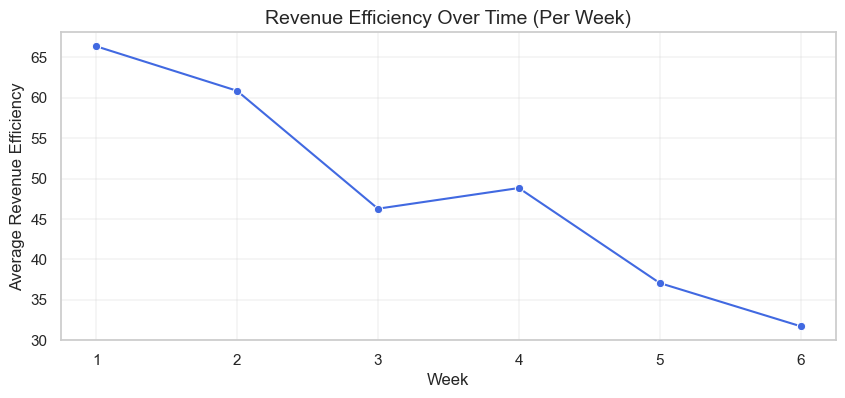

In [ ]:
# Calculate average revenue efficiency per week
weekly_revenue_efficiency = data.groupby('week')['revenue_efficiency'].mean().reset_index()

# Set the style and palette
sns.set(style="whitegrid")

# Plot the revenue efficiency over time (per week)
plt.figure(figsize=(10, 4))
sns.lineplot(data=weekly_revenue_efficiency, x='week', y='revenue_efficiency', marker='o', color='royalblue')
plt.title('Revenue Efficiency Over Time (Per Week)', fontsize=14)
plt.xlabel('Week', fontsize=12)
plt.ylabel('Average Revenue Efficiency', fontsize=12)
plt.grid(color='lightgrey', linestyle='-', linewidth=0.3)
plt.show()

# 6. Summary and Recommendations

## Summary

The Business is doing really well on its email communication. There is a great opportunity to keep the emails and also improve the revenue with a combination of calls and emails as this method have proved a great spent by customers.

## Recommendations

1. Email customers more frequently, fortnightly at a minimum. The first contact worked really well on the first week, after the second email on the third week there was a small increase in sales that massively declined.
2. The number of customers on the email + call method was the lowest, it would be great to contact more people using this method.
3. Collect and store more data of your customers and product (communication dates, order description, product price)
4. Improve the metric with customer's acquisition costs (commercial salaries and marketing spent) to calculate a better return on investiment